# water_level_api module

It is possible with the `water_level_api` module to access the Norwegian water level application programming interface (API), which is available under https://vannstand.kartverket.no/tideapi_en.html.

## Water level API wrapper

**water_level_api.py** is a Python wrapper around the Norwegian water level API. 

Following arguments can be chosen by inialization of the WaterLevelApi instance:

| Argument        | Type     | Default     | Description                                            |
| :-------------- | :------- | :---------- | :----------------------------------------------------- |
| date_from       | required |             | Starting date of data period available                 |
| date_to         | required |             | Ending date of data period                             |
| station         | optional |             | 3-digit station identifier of tide gauge               |
| latitude        | optional |             | Latitude of position in [deg]                          |
| longitude       | optional |             | Longitude of position in [deg]                         |
| datatype        | optional | all         | Type of water level data                               |
| reference_level | optional | chart_datum | Reference level of water level data                    |
| interval        | optional | 10          | Data interval in [min]                                 |
| no_annual_tidal | optional | False       | Annual tidal constituent SA is removed from the tidal predictions, if set to True  |
| url             | optional | https://vannstand.kartverket.no/tideapi.php | URL to download from water level data|

**It should be noted that either the `station` name of the tide gauge has to be given as argument or the position via `latitude` and `longitude argument.**

Following `datatype` types can be chosen as argument:

| Option | Description                                            |
| :----- | :----------------------------------------------------- |
| all    | `obs` and `pre` data and in addition tidal forecast if available |
| obs    | observed/estimated water level                         |
| pre    | tidal predictions                                      |
| tab    | tide table with high and low tides                     |

The `reference_level` argument can be given by:

| Option         | Description                                            |
| :------------- | :----------------------------------------------------- |
| chart_datum    | Reference level for depths in navigational charts and heights in tide tables |
| mean_sea_level | The average height of the surface of the sea for all stages of the tide over a 19-year period (1996-2014) |
| nn2000         | Norwegian vertical datum of 2000 |

Following 3-digit tige gauge `station` identifier (ID) can be selected:

| ID  | Name         | Latitude [deg ] | Longitude [deg] |
| :-- | :----------- | :-------------- | :-------------- |
| ANX | Andenes      | 69.326067       | 16.134848       |
| BGO | Bergen       | 60.398046       | 5.320487        |
| BOO | Bodø         | 67.292330       | 14.399770       |
| BRJ | Bruravik     | 60.492094       | 6.893949        |
| HFT | Hammerfest   | 70.664750       | 23.678690       |
| HAR | Harstad      | 68.801261       | 16.548236       |
| HEI | Heimsjøen    | 63.425224       | 9.101504        |
| HRO | Helgeroa     | 58.995212       | 9.856379        |
| HVG | Honningsvåg  | 70.980318       | 25.972697       |
| KAB | Kabelvåg     | 68.212639       | 14.482149       |
| KSU | Kristiansund | 63.113920       | 7.736140        |
| LEH | Leirvik      | 59.766394       | 5.503670        |
| MSU | Mausund      | 63.869331       | 8.665231        |
| MAY | Måløy        | 61.933776       | 5.113310        |
| NVK | Narvik       | 68.428286       | 17.425759       |
| NYA | Ny-Ålesund   | 78.928545       | 11.938015       |
| OSC | Oscarsborg   | 59.678073       | 10.604861       |
| OSL | Oslo         | 59.908559       | 10.734510       |
| RVK | Rørvik       | 64.859456       | 11.230107       |
| SBG | Sandnes      | 58.868232       | 5.746613        |
| SIE | Sirevåg      | 58.505200       | 5.791602        |
| SOY | Solumstrand  | 59.710622       | 10.273018       |
| SVG | Stavanger    | 58.974339       | 5.730121        |
| TRG | Tregde       | 58.006377       | 7.554759        |
| TOS | Tromsø       | 69.646110       | 18.954790       |
| TRD | Trondheim    | 63.436484       | 10.391669       |
| TAZ | Træna        | 66.496624       | 12.088633       |
| VAW | Vardø        | 70.374978       | 31.104015       |
| VIK | Viker        | 59.036046       | 10.949769       |
| AES | Ålesund      | 62.469414       | 6.151946        |

### Use of water level API wrapper

In [ ]:
# Standard library imports
from datetime import datetime

# Third party imports
import numpy as np

# Import Midgard logging module
from midgard.dev import log

# Import water level API wrapper
from midgard.api import water_level_api

# Initialize logging information
#
# Note: If logging module is not initialized, then the additional logging information are not printed.
log.init(log_level="info")

# Define file path of XML file received by water level API
file_path = "../examples/api/water_level_api.xml"

# Get instance of WaterLevelApi class for tide gauge ANX (Andenes) 
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        station="ANX",
        datatype="all",
        reference_level="mean_sea_level",
        interval=10,
        no_annual_tidal=False,
)

# Get instance of WaterLevelApi class for given location
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        latitude=69.326067,
        longitude=16.134848,
        datatype="all",
        reference_level="mean_sea_level",
        interval=10,
        no_annual_tidal=False,
)

# Get overview available water level API functions
dir(api)

The water level data can either be saved in a dictionary by using `as_dict()` method or in a Midgard dataset by using `as_dataset()`. Following fields/parameters are saved in the dictionary/dataset:

| Parameter           | Description                                                                           |
| :------------------ | :------------------------------------------------------------------------------------ |
| flag                | Data flag (obs: observation, pre: prediction, weather: weather effect, forecast: forecast, high: high tides, low: low tides) |
| time                | Observation time                                                                      |
| water_level         | Water level in [m]                                                                    |

In [2]:
# Get data as dictionary
data = api.as_dict()

# Select only tidal prediction data 
idx = np.array(data["flag"]) == "pre"
water_level_pre = np.array(data["water_level"])[idx]
time_pre = np.array(data["time"])[idx]

# Get data as dataset
dset = api.as_dataset()

# Select only tidal prediction data 
idx = dset.filter(flag="pre")
water_level_pre = dset.water_level[idx]
time_pre = dset.time[idx]

The type of the water level data can by chosen by inialization of the WaterLevelApi instance with the `datatype` argument. That means the tidal data can also be selected via `datatype` argument as shown in the following example:

In [3]:
# Get only tidal prediction data
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        latitude=69.326067,
        longitude=16.134848,
        datatype="pre",
)

# Get data as dictionary
data = api.as_dict()

In following the water level data for the Andenes location are plotted.

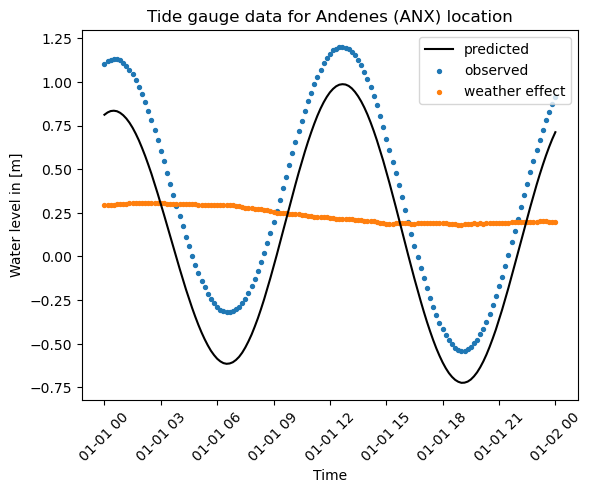

In [4]:
# Import matplotlib module
import matplotlib.pyplot as plt

# Filter data in dependency of flag types
idx_obs = dset.filter(flag="obs")
idx_pre = dset.filter(flag="pre")
idx_wea = dset.filter(flag="weather")

# Plot data
plt.plot(
        dset.time.datetime[idx_pre], 
        dset.water_level[idx_pre], 
        label="predicted",
        color="black",
)
plt.scatter(
        dset.time.datetime[idx_obs], 
        dset.water_level[idx_obs], 
        label="observed",
        s=8,
)
plt.scatter(
        dset.time.datetime[idx_wea], 
        dset.water_level[idx_wea], 
        label="weather effect",
        s=8,
)
plt.title(
    f"Tide gauge data for Andenes (ANX) location"
)
plt.xlabel("Time")
plt.ylabel("Water level in [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

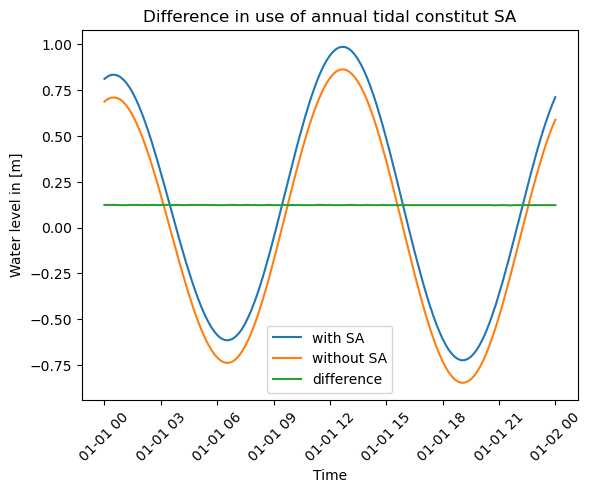

In [5]:
# Get instance of WaterLevelApi class for given location WITHOUT using annual tidal SA coefficients
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        latitude=69.326067,
        longitude=16.134848,
        datatype="pre",
        reference_level="mean_sea_level",
        interval=10,
        no_annual_tidal=False,
)

# Get data as dataset
dset_sa = api.as_dataset()

# Get instance of WaterLevelApi class for given location BY using annual tidal SA coefficients
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        latitude=69.326067,
        longitude=16.134848,
        datatype="pre",
        reference_level="mean_sea_level",
        interval=10,
        no_annual_tidal=True,
)

# Get data as dataset
dset_no_sa = api.as_dataset()

# Plot data
plt.plot(
        dset_sa.time.datetime, 
        dset_sa.water_level, 
        label="with SA",
)
plt.plot(
        dset_no_sa.time.datetime, 
        dset_no_sa.water_level, 
        label="without SA",
)

plt.plot(
        dset_sa.time.datetime, 
        dset_sa.water_level - dset_no_sa.water_level, 
        label="difference",
)
plt.title(
    f"Difference in use of annual tidal constitut SA"
)
plt.xlabel("Time")
plt.ylabel("Water level in [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()